# Modelos Lineares

## Regressão Linear


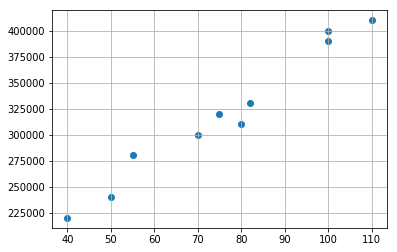

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

H = np.array([[100],
[110],  
[50],  
[70],  
[80],  
[40],
[100],
[55],
[75],
[82]])

P = np.array([400000, 410000, 240000, 300000, 310000, 220000, 390000, 280000, 320000, 330000])

plt.scatter(H[:,0], P)
plt.grid()

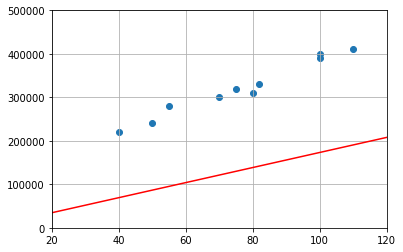

In [3]:
from math import sin, cos, radians
theta = radians(30)
linelength = 200
x = linelength * cos(theta)
y = linelength * sin(theta) * 3000
plt.scatter(H[:,0], P)
plt.plot(np.array([0,x]),np.array([0,y]), c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

In [ ]:
def f(x):
    a = 2000
    b = 200000
    return a*x + b

plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[f(x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

$$ \hat{y} = b + w \cdot x $$

In [ ]:
w = 2000
b = 200000

def predict(w,b,x):
    return b + (w * x)

$$ w_{k+1} = w_{k} - \alpha ( \frac {2} {N} \sum_{i=1}^N (-x_i \cdot (y_i - \hat{y_i})) ) $$

$$ b_{k+1} = b_k - \alpha (\frac {2} {N} \sum_{i=1}^N -(y_i - \hat{y_i})) $$

In [ ]:
def gradient_descendent(train_X, train_Y, alpha, w = 0, b = 0):
    sum_error = 0
    elem_times_error = 0
    n = len(train_X)
    for x,y in zip(train_X, train_Y):
        yhat = predict(w, b, x)
        error = y - yhat
        sum_error += error
        elem_times_error += x * error
            
    b = b + (2 * (alpha * sum_error) / n)
    w = w + (2 * (alpha * elem_times_error) / n)
#     print(('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error)))
    return (w,b)

In [ ]:
w = 0
b = 0
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[predict(w,b,x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

In [ ]:
w,b = gradient_descendent(H[:,0], P, 0.00001, w, b)
print(w,b)
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),[predict(w,b,x) for x in H[:,0]], c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(H,P)

In [ ]:
y_predicted = model.predict(H)
plt.scatter(H[:,0], P)
plt.plot(np.array(H[:,0]),y_predicted, c='r')
plt.xlim((20,120))
plt.ylim((0,500000))
plt.grid()

error = np.sqrt(mean_squared_error(P,y_predicted))
print("Mean Error: {}".format(error))

### Pausa para o vinho

Calma, claro que não vamos parar essa aula maravilhosa para tomar vinho(embora não pareça uma má ideia), mas que tal se a gente misturasse essas duas coisas lindas juntas: vinhos e regressão linear?

No arquivo *winequality-white.csv* temos um conjunto de dados de qualidade do vinho que envolve a previsão da qualidade dos vinhos brancos em uma escala, com medidas químicas de cada vinho. É um problema de classificação multiclasse (algo que veremos mais na frente), mas também pode ser enquadrado como um problema de regressão. O número de observações para cada classe não é equilibrado. Existem 4.898 observações com 11 atributos de entrada e 1 atributo de saída. Os nomes das variáveis são os seguintes:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide. 
7. Total sulfur dioxide. 
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

Que tal você fazer um modelo de regressão linear que seja capaz de aproximar a qualidade dessas bebidas? Ainda vou ser legal e vou deixar os dados carregados na memória para você!

In [ ]:
import pandas as pd
data = pd.read_csv("winequality-white.csv", delimiter=';')
data.head()

## Regressão Logística

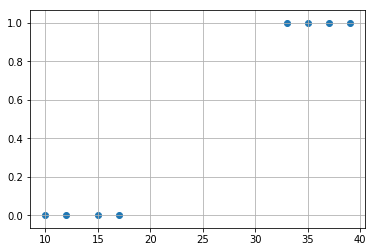

In [4]:
M = np.array([[10],[12],[15],[17], [33],[35],[37],[39]])
V = np.array([0,0,0,0,1,1,1,1])

plt.scatter(M, V)
plt.grid()

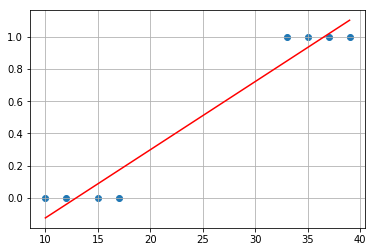

In [7]:
model = LinearRegression()
model.fit(M,V)
y_predicted_linear = model.predict(M)
plt.scatter(M, V)
plt.grid()
plt.plot(M,y_predicted_linear, c='r')

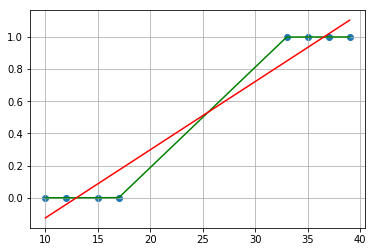

In [12]:
from math import exp
def logistic_function(w,b,x):
    return 1 / ( 1 + exp( - ( b+(w*x) ) ) )

w = 0.89
b = -22.1
plt.scatter(M, V)
plt.grid()
plt.plot(M, [logistic_function(w,b,x) for x in M[:,0]], c='g')
plt.plot(M,y_predicted_linear, c='r')

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression(penalty="l2", C=1e42) #estes argumentos desabilitam a regularização
model.fit(M,V)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

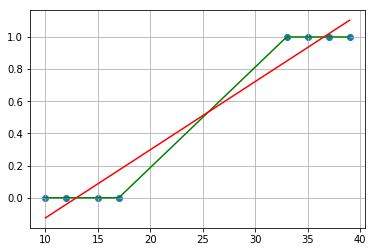

In [15]:
y_predicted = model.predict(M)
plt.scatter(M, V)
plt.grid()
plt.plot(M,y_predicted, c='g')
plt.plot(M,y_predicted_linear, c='r')